Colab Stuff  
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neverorfrog/drl_continuous/blob/main/drl_continous/scripts/frozen_lake_main.ipynb)

In [1]:
import sys
import warnings

warnings.filterwarnings('ignore')

COLAB_RUNTIME = 'google.colab' in sys.modules
if COLAB_RUNTIME:
    !nvidia-smi &> /dev/null || echo -e "\e[31mWarning: No GPU found. Please check your runtime settings.\e[0m"
    !git config --global init.defaultBranch main
    !git init
    !git remote add origin https://github.com/neverorfrog/drl_continuous.git
    !git pull origin main
    !pip install --quiet -e .

Imports

In [2]:
from drl_continuous.environments import ContinuousFrozenLake
from drl_continuous.agents import SAC
import wandb
from drl_continuous.utils.definitions import RewardType
from drl_continuous.utils import generate_heatmap, project_root
import numpy as np

pygame 2.5.2 (SDL 2.28.2, Python 3.11.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


Configuration Stuff

In [3]:
env_reward_type = RewardType.model
map_name = "block2"
experiment_name = f"sac-{env_reward_type.name}-{map_name}"
training = True

Plotting Heatmap

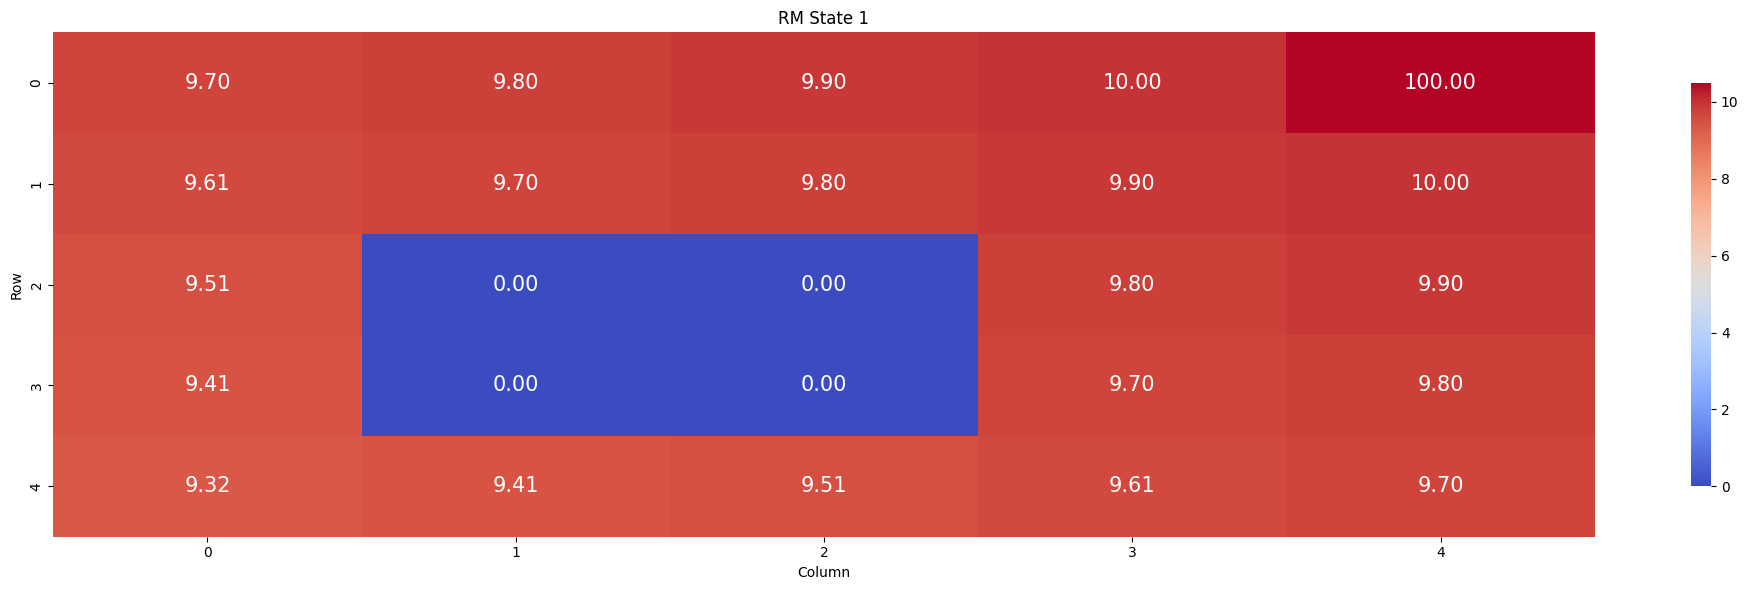

In [4]:
root = project_root()
if env_reward_type == RewardType.model:
    generate_heatmap(np.load(f"{root}/drl_continuous/utils/q_tables/deterministic/q_tables_{map_name}.npz"), grid_size=(5, 5))

Initializing Agent and Environment

In [5]:
env = ContinuousFrozenLake(map_name =  map_name, reward_type = env_reward_type, is_rendered = False, is_slippery = False)
agent = SAC(name = experiment_name, env = env, max_episodes = 300)

In [6]:
if training:
    wandb.init(project="continuous-frozenlake", group=experiment_name)
    agent.train()
    wandb.finish()
    agent.save()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: neverorfrog (neverorfrog-sapienza). Use `wandb login --relogin` to force relogin


Episode 199 Alpha: 0.10 Mean Reward: 919.94 Ep_Reward: 977.39 Termination: MAX STEPS REACHED:  66%|██████▋   | 199/300 [02:01<00:57,  1.77it/s]

MODELS SAVED!


Episode 300 Alpha: 0.03 Mean Reward: 705.25 Ep_Reward: 350.58 Termination: GOAL REACHED: 100%|██████████| 300/300 [02:42<00:00,  1.84it/s]     


mean_num_steps,███████████████████████████████▇▇▆▆▅▄▃▂▁
mean_reward,▂▅▅▆▆▆▇▇▇▇▇▇██████████████▇▇███▇▇▆▅▄▄▂▂▁
num_steps,█████████████████████████████▆▂▁█▂▂▄▄▁▂▁
reward,█████████████████████████████▇▂▁█▂▂▅▄▁▂▁
mean_num_steps,70.16
mean_reward,705.24747
num_steps,27
reward,350.58285


MODELS SAVED!


In [7]:
agent.load()
env.is_rendered = True
agent.evaluate()
env.quit_render()

MODELS LOADED!


Episode 3 Mean Reward: 292.26 Ep_Reward: 292.26 Termination: GOAL REACHED: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]
